In [43]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("merged_data/imdb_merged.csv")
print(df.describe())
print(df.info())

             budget      runtime      screens  opening_week  \
count  3.289000e+03  3289.000000  3289.000000  3.289000e+03   
mean   4.702618e+07   109.224688  2321.865309  1.740371e+07   
std    5.085528e+07    17.828588  1211.523189  2.565945e+07   
min    1.100000e+03    68.000000     1.000000  1.450000e+03   
25%    1.400000e+07    96.000000  1473.000000  2.182900e+06   
50%    3.000000e+07   106.000000  2610.000000  1.000383e+07   
75%    6.000000e+07   119.000000  3191.000000  2.131141e+07   
max    4.000000e+08   219.000000  4725.000000  3.571150e+08   

       domestic_box_office      ratings     user_vote        month  \
count         3.289000e+03  3289.000000  3.289000e+03  3289.000000   
mean          5.940173e+07     6.365613  3.257919e+05     6.946488   
std           8.176949e+07     1.005275  1.675771e+06     3.429272   
min           9.069000e+03     1.500000  4.600000e+01     1.000000   
25%           1.213856e+07     5.800000  4.100000e+04     4.000000   
50%         

In [9]:
df.head(5)

,tt_id,rl_id,movie_name,country,month,year,mpaa,budget,runtime,screens,opening_week,domestic_box_office,genres
0,NaN,NaN,(500) Days of Summer,United States,9.0,2009.0,PG-13,7500000.0,95.0,27.0,834501.0,32425665.0,NaN
1,tt1179933,rl1329956353,10 Cloverfield Lane,United States,3.0,2016.0,PG-13,15000000.0,103.0,3427.0,24727437.0,72082999.0,Drama Horror Mystery Sci-Fi Thriller
2,NaN,NaN,"10,000 B.C.",United States,3.0,2008.0,PG-13,105000000.0,109.0,3410.0,35867488.0,94784201.0,NaN
3,tt0443649,rl977372673,10000 BC,NaN,3.0,2008.0,PG-13,105000000.0,109.0,3454.0,35867488.0,94784201.0,Action Adventure Drama Fantasy History
4,tt0211181,rl927041025,102 Dalmatians,United States,11.0,2000.0,G,85000000.0,100.0,2704.0,19883351.0,66957026.0,Adventure Comedy Family


In [7]:
df = df.dropna(
    subset=[
        "movie_name",
        "month",
        "year",
        "mpaa",
        "budget",
        "runtime",
        "screens",
        "opening_week",
        "domestic_box_office",
    ]
)

In [16]:
df.isnull().sum()



tt_id                  165
rl_id                  165
movie_name               0
mpaa                     0
budget                   0
runtime                  0
screens                  0
opening_week             0
domestic_box_office      0
ratings                  0
user_vote                0
country                  0
genres                   0
month                    0
year                     0
dtype: int64

In [18]:
row_count = df.shape[0]
print(row_count)

df = df[df["domestic_box_office"]>5000000]

row_count = df.shape[0]
print(row_count)


2863
2863


In [5]:
df.dropna(subset=["month","year","runtime","budget","mpaa","screens","opening_week","domestic_box_office"], inplace=True)
row_count = df.shape[0]
print(row_count)

3677


In [6]:
df=df[df['mpaa']!='Not']
row_count = df.shape[0]
print(row_count)

3677


In [51]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3205 entries, 1 to 7199
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   movie_name                3205 non-null   object 
 1   month                     3205 non-null   float64
 2   year                      3205 non-null   float64
 3   mpaa                      3205 non-null   object 
 4   budget                    3205 non-null   float64
 5   runtime                   3205 non-null   float64
 6   screens                   3205 non-null   float64
 7   opening_week              3205 non-null   float64
 8   domestic_box_office       3205 non-null   float64
 9   international_box_office  3111 non-null   float64
 10  worldwide_box_office      3119 non-null   float64
 11  country                   3069 non-null   object 
 12  genres                    555 non-null    object 
dtypes: float64(9), object(4)
memory usage: 350.5+ KB
None


In [52]:
features_numerical = (
    df.select_dtypes(exclude=["object"]).copy()
)

In [53]:
features_numerical.columns

Index(['month', 'year', 'budget', 'runtime', 'screens', 'opening_week',
       'domestic_box_office', 'international_box_office',
       'worldwide_box_office'],
      dtype='object')

In [54]:
features_categorical = df.select_dtypes(include=["object"]).copy()
features_categorical.columns

Index(['movie_name', 'mpaa', 'country', 'genres'], dtype='object')

In [55]:
features_numerical = features_numerical.drop("domestic_box_office", axis=1)
features_numerical = features_numerical.drop("worldwide_box_office", axis=1)
features_numerical = features_numerical.drop("international_box_office", axis=1)

C:\Users\Nam\AppData\Local\Temp\ipykernel_44664\4072711137.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
d:\Python312\Lib\site-packages\seaborn\distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\Nam\AppData\Local\Temp\ipykernel_44664\4072711137.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your co

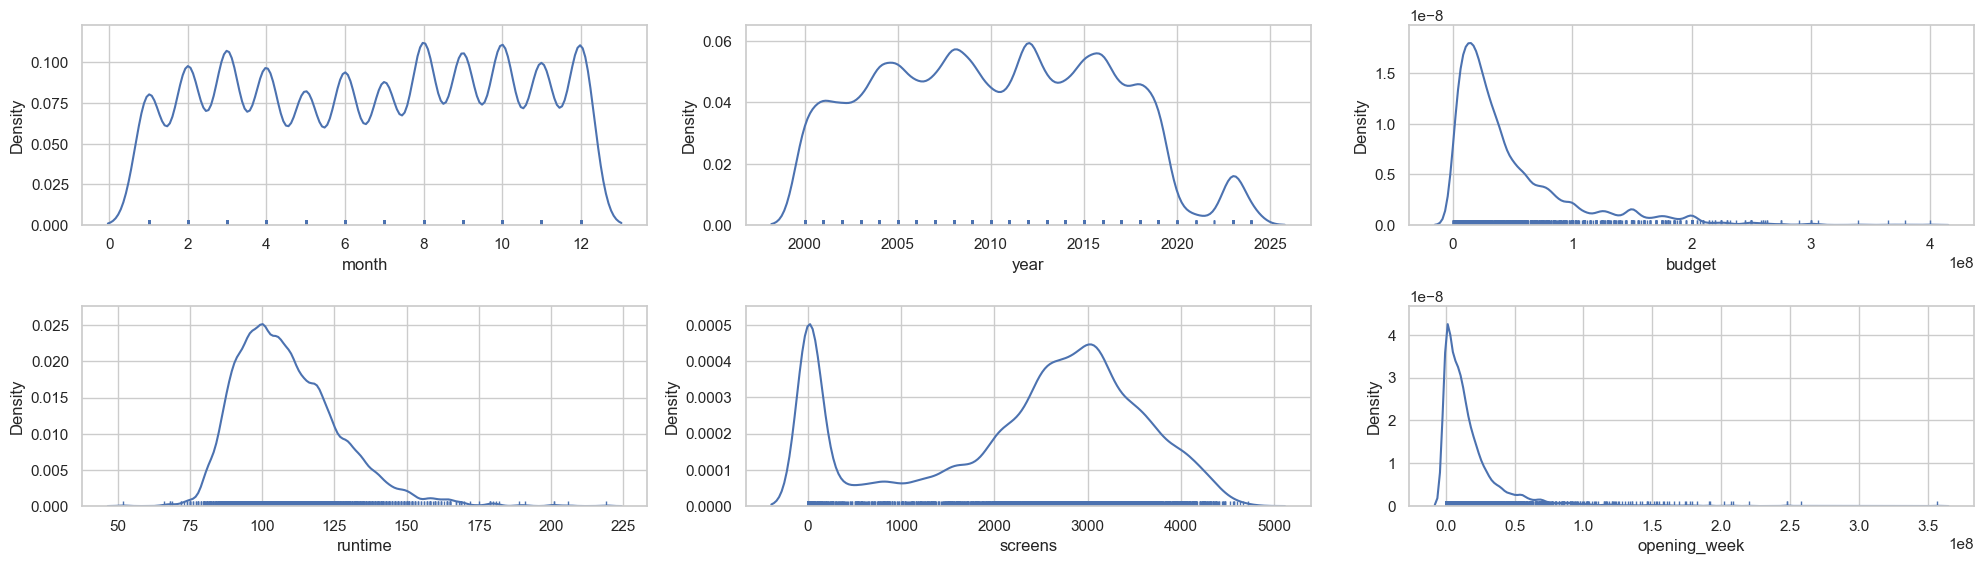

In [56]:
fig = plt.figure(figsize=(20, 25))
sns.set(style="whitegrid")
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 3, i + 1)
    sns.distplot(
        features_numerical.iloc[:, i].dropna(),
        rug=True,
        hist=False,
        kde_kws={"bw": 0.1},
        color="b",
    )
    plt.xlabel(features_numerical.columns[i])
plt.tight_layout()

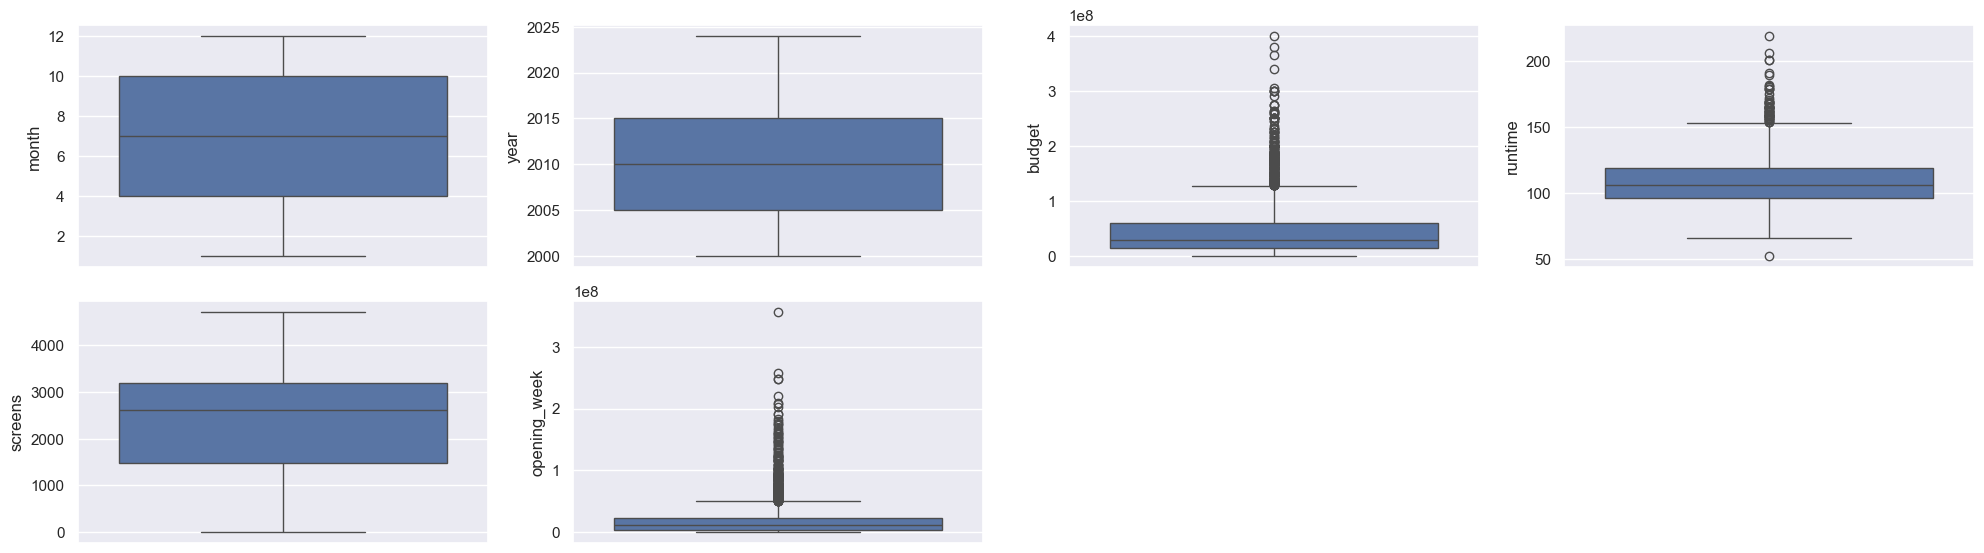

In [57]:
fig = plt.figure(figsize=(20, 25))
sns.set(style="darkgrid")
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 4, i + 1)
    sns.boxplot(y=features_numerical.iloc[:, i].dropna())
plt.tight_layout()

In [58]:
outliers = df[["budget","runtime","screens","opening_week"]]

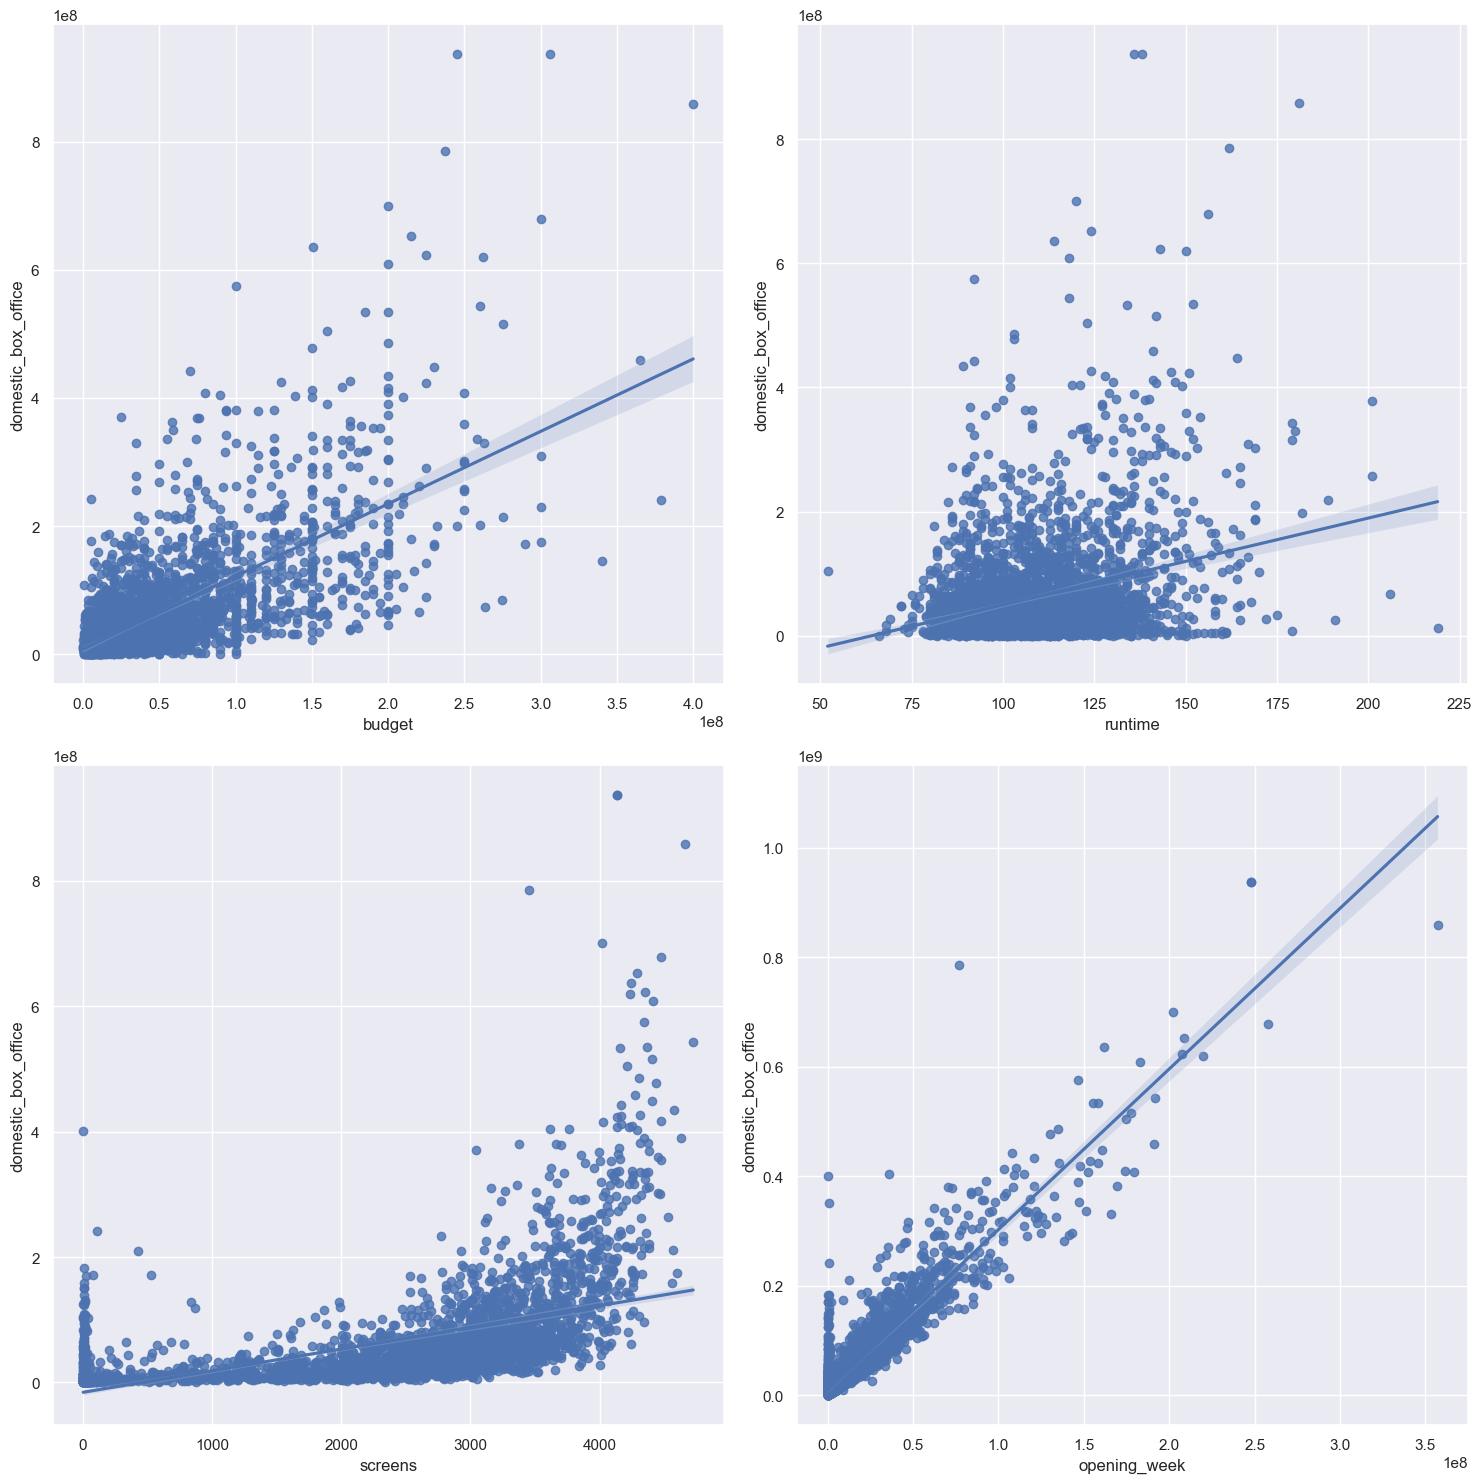

In [59]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

for i, ax in enumerate(axes.flatten()):
    if i < len(outliers.columns):
        sns.regplot(x=outliers.iloc[:, i], y=df.domestic_box_office, ax=ax)

plt.tight_layout()
plt.show()

2016.0
Number of movie:  141
2008.0
Number of movie:  150
2009.0
Number of movie:  152
2018.0
Number of movie:  136
2013.0
Number of movie:  138
2010.0
Number of movie:  139
2004.0
Number of movie:  152
2007.0
Number of movie:  135
2001.0
Number of movie:  143
2006.0
Number of movie:  161
2003.0
Number of movie:  133
2019.0
Number of movie:  116
2012.0
Number of movie:  141
2014.0
Number of movie:  137
2002.0
Number of movie:  155
2011.0
Number of movie:  147
2017.0
Number of movie:  134
2023.0
Number of movie:  59
2005.0
Number of movie:  142
2015.0
Number of movie:  128
2020.0
Number of movie:  1


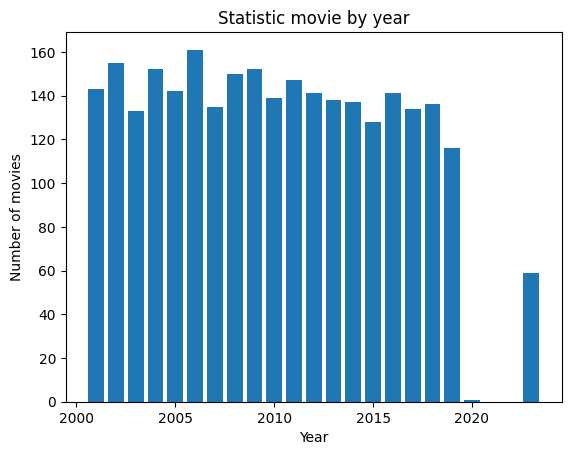

In [19]:
df = df[(df["year"] >= 2001) & (df["year"] <= 2023)]
years=df['year'].unique()
number_movie = []
for y in years:
    print(y)
    print("Number of movie: ",df[df["year"] == y]["movie_name"].count())
    number_movie.append(df[df['year']==y]['movie_name'].count())
plt.bar(years, number_movie)
plt.title("Statistic movie by year")
plt.xlabel("Year")
plt.ylabel("Number of movies")
plt.show()

domestic_box_office
(0.0, 100000000.0]             2186
(100000000.0, 200000000.0]      370
(200000000.0, 300000000.0]      103
(300000000.0, 400000000.0]       47
(400000000.0, 500000000.0]       19
(600000000.0, 700000000.0]        6
(500000000.0, 600000000.0]        5
(700000000.0, 800000000.0]        2
(800000000.0, 900000000.0]        1
(900000000.0, 1000000000.0]       1
Name: count, dtype: int64


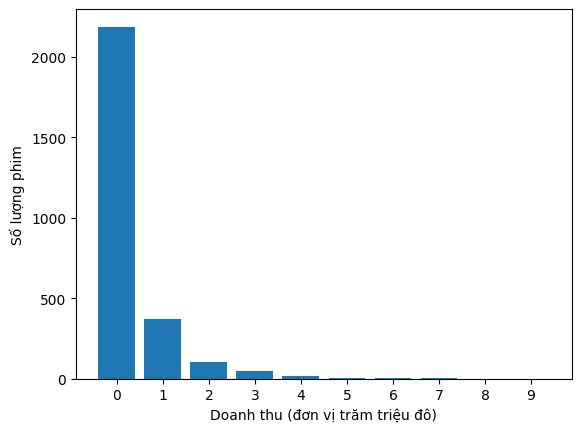

In [21]:
import matplotlib.ticker as mticker
from matplotlib.ticker import ScalarFormatter


bins = [
    0,
    1e8,
    2e8,
    3e8,
    4e8,
    5e8,
    6e8,
    7e8,
    8e8,
    9e8,
    10e8
]  

categories = pd.cut(df["domestic_box_office"], bins)

revenue_counts = categories.value_counts()

print(revenue_counts)

plt.bar([str(cat) for cat in revenue_counts.index], revenue_counts)

plt.xlabel("Doanh thu (đơn vị trăm triệu đô)")
plt.ylabel("Số lượng phim")

plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style="sci", axis="x", scilimits=(0, 0))

plt.show()

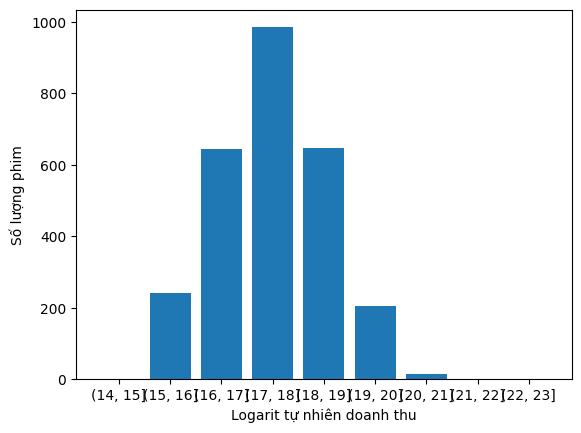

In [22]:
df["log_revenue"] = np.log(df["domestic_box_office"])

log_bins = [
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    21,
    22,
    23,
]  

log_categories = pd.cut(df["log_revenue"], log_bins)

log_revenue_counts = log_categories.value_counts()
log_revenue_counts = log_revenue_counts.sort_index()

plt.bar([str(cat) for cat in log_revenue_counts.index], log_revenue_counts)

plt.xlabel("Logarit tự nhiên doanh thu")
plt.ylabel("Số lượng phim")

plt.show()

<Figure size 1000x800 with 0 Axes>

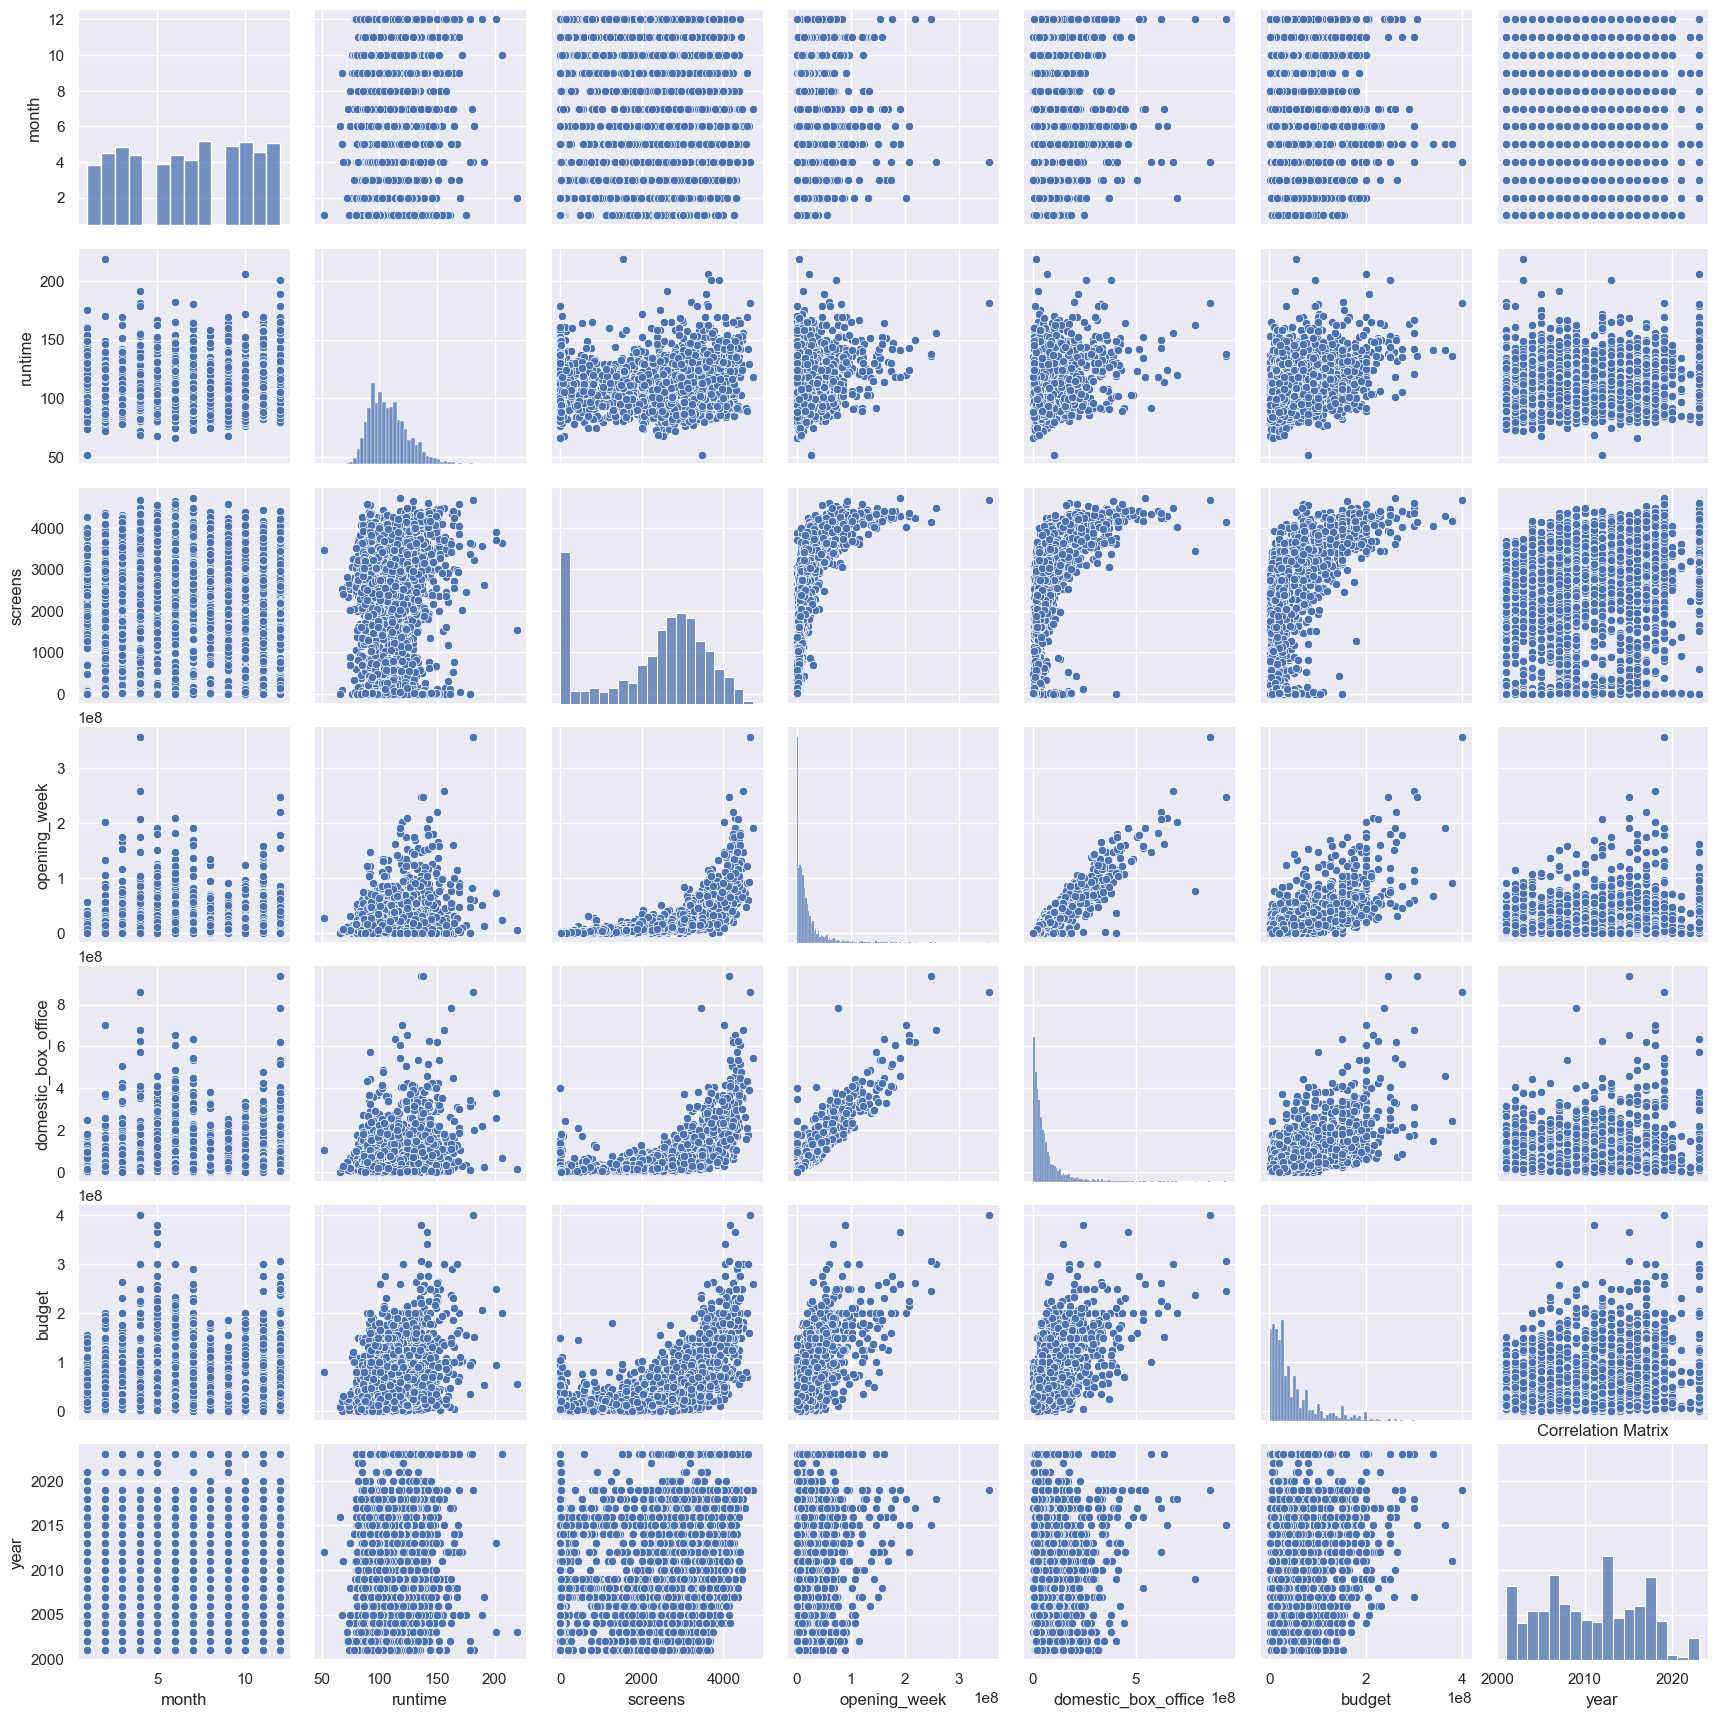

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = [
    "month",
    "runtime",
    "screens",
    "opening_week",
    "domestic_box_office",
    "budget",
    "year",
]
correlation_matrix = df[columns].corr()

plt.figure(figsize=(10, 8))
sns.pairplot(df[columns])
plt.title("Correlation Matrix")
plt.show()

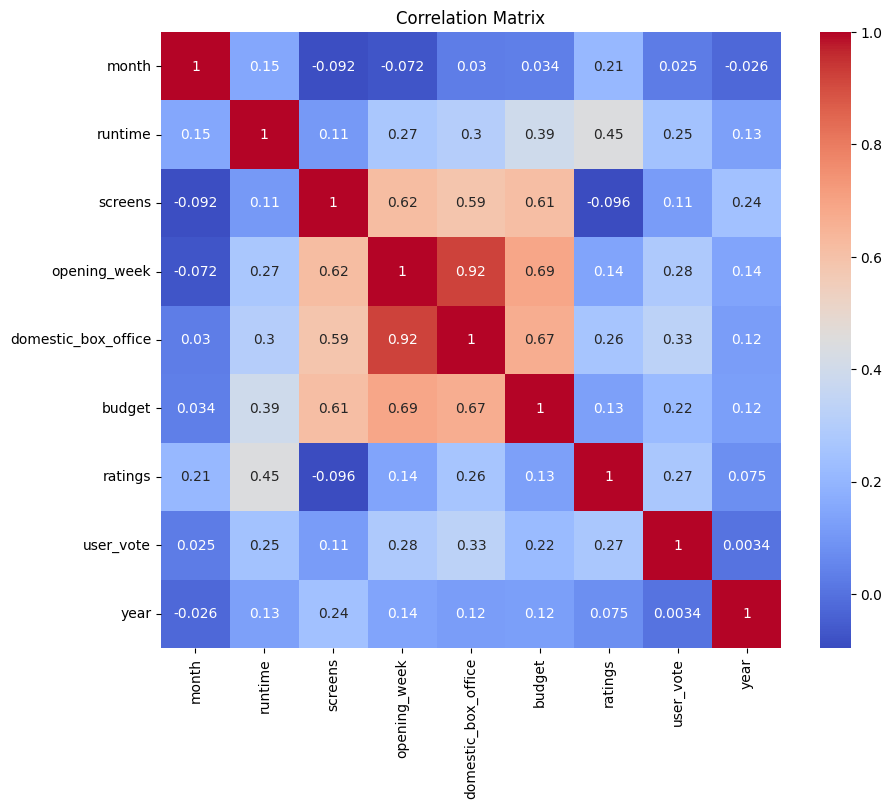

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = [
    "month",
    "runtime",
    "screens",
    "opening_week",
    "domestic_box_office",
    "budget",
    "ratings",
    "user_vote",
    "year",
]
correlation_matrix = df[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Đọc dữ liệu từ file CSV
data = pd.read_csv("merged_data/imdb_merged.csv")

# Lựa chọn các cột cần thiết
selected_columns = [
    "month",
    "year",
    "mpaa",
    "budget",
    "runtime",
    "screens",
    "opening_week",
    "domestic_box_office",
    "user_vote",
    "ratings",
    "country",
]
data = data[selected_columns]

# Loại bỏ dòng có giá trị NaN
data.dropna(inplace=True)

# Chuyển đổi thuộc tính mpaa và country sang dạng số
label_encoder = LabelEncoder()
data["mpaa"] = label_encoder.fit_transform(data["mpaa"])
data["country"] = label_encoder.fit_transform(data["country"])

# Tạo features và target
X = data.drop("domestic_box_office", axis=1)
y = data["domestic_box_office"]

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Tiền xử lý dữ liệu và áp dụng mô hình Random Forest
numeric_features = [
    "month",
    "year",
    "budget",
    "runtime",
    "screens",
    "opening_week",
    "user_vote",
    "ratings",
]
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
    ]
)

pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", RandomForestRegressor(n_estimators=150,random_state=42)),
    ]
)

# Huấn luyện mô hình
pipeline.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = pipeline.predict(X_test)

# 47 Meters Down,5.0,2017.0,PG-13,5300000.0,89.0,2270.0,11205562.0,44307193.0,18326512.0,62633705.0,United States,
# 47 Meters Down: Uncaged,8.0,2019.0,PG-13,12000000.0,89.0,2853.0,8427265.0,22260900.0,25321663.0,47582563.0,"United Kingdom, United States",
# 47 Ronin,12.0,2013.0,PG-13,175000000.0,127.0,2689.0,9910310.0,38362475.0,113354340.0,151716815.0,United States,
# 50 First Dates,3.0,2004.0,PG-13,75000000.0,96.0,3591.0,39852237.0,120776832.0,75543497.0,196320329.0,United States,

label_encoder = LabelEncoder()

movie = {
    "month": 8.0,
    "year": 2019.0,
    "mpaa": "PG-13",
    "budget": 12000000.0,
    "runtime": 89.0,
    "screens": 2853.0,
    "opening_week": 8427265.0,
    "country": "United Kingdom, United States",
    "user_vote": 5.0,
    "ratings": 31000.0,
}
# Chuyển đổi thuộc tính mpaa và country sang dạng số
movie["mpaa"] = label_encoder.fit_transform([movie["mpaa"]])[0]
movie["country"] = label_encoder.fit_transform([movie["country"]])[0]

# Tạo một DataFrame từ dictionary movie
movie_df = pd.DataFrame([movie])

# Tiền xử lý dữ liệu của phim cần dự đoán
numeric_features = [
    "month",
    "year",
    "budget",
    "runtime",
    "screens",
    "opening_week",
    "user_vote",
    "ratings",
]
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
    ]
)

# Dự đoán doanh thu của phim
revenue_predict = pipeline.predict(movie_df)

print("Predicted revenue:", revenue_predict)
# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Predicted revenue: [27194186.70666667]
Mean Squared Error (MSE): 1123142497939901.0
Root Mean Squared Error (RMSE): 33513318.21738786
R^2 Score: 0.8416955345318362
